In [1]:
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import skew

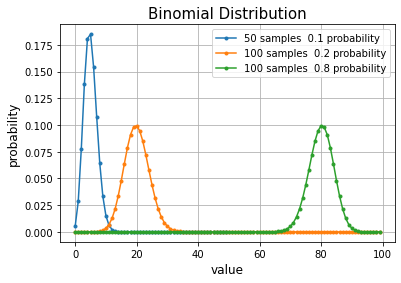

In [14]:
# calculate and plot binomial distribution - any three(or other) examples
p1 = 0.1
k1 = 50
p2 = 0.2
k2 = 100
p3 = 0.8
k3 = 100
p_values =[p1, p2, p3]
k_values = [k1, k2, k3]

for n in range(len(p_values)):
    p = p_values[n]
    k = k_values[n]
    bin_values = []
    x_values = [x for x in range(k)]
    for n in range(k):
        factor = math.factorial(k) / (math.factorial(n) * math.factorial(k - n))
        bin_values.append(factor * (p**n) * ((1 - p)**(k - n)))
    plt.plot(x_values, bin_values, marker='.', label='{} samples  {} probability'.format(k, p))

plt.title('Binomial Distribution', fontsize=15)
plt.ylabel('probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.legend()
plt.grid()
plt.show();

expected successes: 800000
total successes: 799288


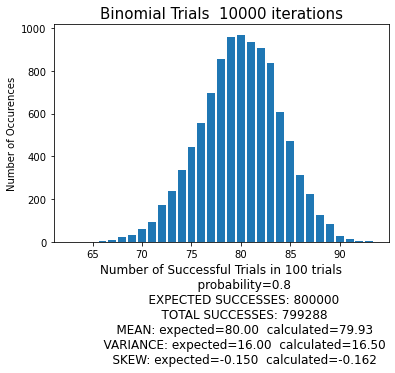

In [12]:
# binomial process  simulation of counting success
from numpy.random import binomial
# define the parameters of the distribution
p = .8
k = 100
iterations = 10000
total_successes = 0
success_list = []
hist_dict = {}  #dictionary keeps track of successes by values

for i in range(iterations):
    #success is number of successes
    success = binomial(k, p)
    total_successes += success
    success_list.append(success)
    hist_dict[success] = hist_dict.get(success, 0) + 1

print('expected successes:', int(p*k*iterations))
print('total successes:', total_successes)

#histogram of successful values over all trials
hdata = sorted(hist_dict.items())
number, occurences = zip(*hdata)

#expected values
ex_mean, ex_var, ex_skew, ex_kurt = binom.stats(k, p, moments='mvsk')

#statistics
samp_mean = statistics.mean(success_list)
samp_var = np.var(success_list)
samp_skew = skew(success_list)

plt.clf()
plt.title('Binomial Trials  {} iterations'.format(iterations), fontsize=15)
plt.xlabel('Number of Successful Trials in {} trials\n\
            probability={}\n\
            EXPECTED SUCCESSES: {:}\n\
            TOTAL SUCCESSES: {:}\n\
            MEAN: expected={:.2f}  calculated={:.2f}\n\
            VARIANCE: expected={:.2f}  calculated={:.2f}\n\
            SKEW: expected={:.3f}  calculated={:.3f}'\
            .format(k, p, int(p*k*iterations), total_successes,\
            ex_mean, samp_mean, ex_var, samp_var, ex_skew, samp_skew), fontsize=12)
plt.ylabel("Number of Occurences")

plt.bar(number, occurences)
plt.show();


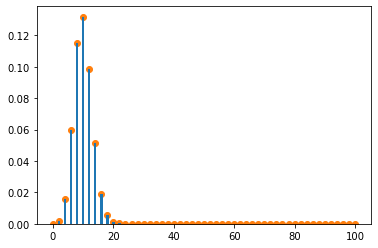

In [4]:
# PMF for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.1
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
dist_pmf = []
dist_n = []
for n in range(0, 102, 2):
    # print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))
    dist_pmf.append(dist.pmf(n))
    dist_n.append(n)
plt.bar(dist_n, dist_pmf)
plt.scatter(dist_n, dist_pmf)
plt.show();

P of 0 success: 0.000%
P of 10 success: 0.000%
P of 20 success: 1.646%
P of 30 success: 54.912%
P of 40 success: 98.750%
P of 50 success: 99.999%
P of 60 success: 100.000%
P of 70 success: 100.000%
P of 80 success: 100.000%
P of 90 success: 100.000%
P of 100 success: 100.000%


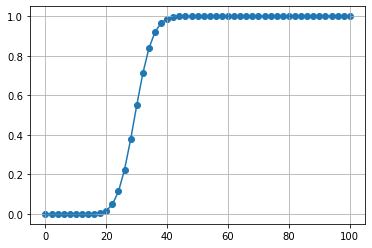

In [3]:
# CDF for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of <=n successes
for n in range(0, 110, 10):
    print('P of %d success: %.3f%%' % (n, dist.cdf(n)*100))
dist_cdf = []
dist_n = []
for n in range(0, 102, 2):
    dist_cdf.append(dist.cdf(n))
    dist_n.append(n)
plt.clf()
plt.plot(dist_n, dist_cdf)
plt.scatter(dist_n, dist_cdf)
plt.grid()
plt.show();

P of 10 success: 0.000%
P of 20 success: 0.000%
P of 30 success: 0.000%
P of 40 success: 0.000%
P of 50 success: 0.002%
P of 60 success: 2.099%
P of 70 success: 53.766%
P of 80 success: 99.111%
P of 90 success: 100.000%
P of 100 success: 100.000%


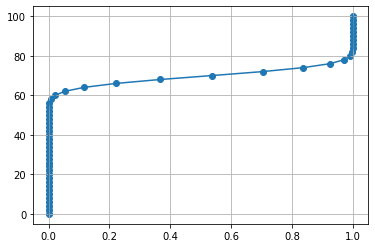

In [4]:
# PPF fuction - quantile
#example of using the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.7
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of <=n successes
for n in range(10, 110, 10):
    print('P of %d success: %.3f%%' % (n, dist.cdf(n)*100))
dist_cdf = []
dist_n = []
for n in range(0, 102, 2):
    dist_cdf.append(dist.cdf(n))
    dist_n.append(n)
plt.clf()
plt.plot(dist_cdf, dist_n)
plt.scatter(dist_cdf, dist_n)
plt.grid()
plt.show();

Case 1: 38
Case 2: 28
Case 3: 34


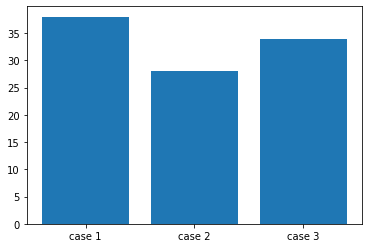

In [8]:
# example of simulating a multinomial process
from numpy.random import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# run a single simulation
cases = multinomial(k, p)
# summarize cases
for i in range(len(cases)):
    print('Case %d: %d' % (i+1, cases[i]))
case_num = [1, 2, 3]
case_name = ['case 1', 'case 2', 'case 3']
plt.bar(case_num, cases)
plt.xticks(case_num, case_name)
plt.show();

In [9]:
# calculate the probability for a given number of events of each type
from scipy.stats import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# define the distribution
dist = multinomial(k, p)
# define a specific number of outcomes from 100 trials
cases = [32, 32, 36]
# calculate the probability for the case
pr = dist.pmf(cases)
# print as a percentage
print('Case=%s, Probability: %.3f%%' % (cases, pr*100))

Case=[32, 32, 36], Probability: 0.703%
